In [1]:
import pandas as pd
import numpy as np
import math
import pymysql

# !pip install soynlp
from soynlp.tokenizer import RegexTokenizer
# !pip install gensim
# from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
con = pymysql.connect(
    host='host',
    user='user',
    password='passwd',
    db='db_name',
    charset='utf8mb4', 
    autocommit=True, 
    cursorclass=pymysql.cursors.DictCursor 
)
cur = con.cursor()

In [5]:
sql = "select * from youtube_data"
cur.execute(sql)
rows = cur.fetchall()
df = pd.DataFrame(rows)
df.head()

,seq,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,0,0,0,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,2,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,0,0,0,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,3,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,0,0,0,퍼가실때 꼭 출처 부탁드려요
3,4,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,0,0,0,다스는 누구겁니까 듣고 난 후 표정
4,5,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,0,0,0,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [5]:
#1. 데이터 전처리
# #제목, 태그, description (사용할 텍스트 컬럼) 따로 분리
# txt_feature = ['title','tags']
# txt_df = df[txt_feature]

# #url 포함 tags 제외
# df_filter = txt_df['tags'].str.contains("http")
# txt_df = txt_df[~df_filter]

# df_filter = txt_df['tags'].str.contains(".com")
# txt_df = txt_df[~df_filter]

In [6]:
txt_df.shape

(34225, 2)

In [7]:
#특문 제거
txt_df['tags'] = txt_df['tags'].str.replace(pat='\"', repl='', regex=True)
# txt_df['tags'] = txt_df['tags'].str.replace(pat='|', repl=',', regex=True) #아래에서 합칠 때 ,를 사용할 것
txt_df['tags'] = txt_df['tags'].str.replace(pat='|', repl=' ', regex=True)
# txt_df['tags'] = txt_df['tags'].str.replace(pat=r'[^A-Za-z0-9가-힣]', repl=' ', regex=True)
# txt_df['tags'] = txt_df['tags'].str.replace(pat=r'[^A-Za-z가-힣]', repl=' ', regex=True)
txt_df['tags'] = txt_df['tags'].str.replace(pat=r'[^가-힣]', repl=' ', regex=True)


# txt_df['title'] = txt_df['title'].str.replace(pat=r'[^A-Za-z0-9가-힣]', repl=' ', regex=True)
# txt_df['title'] = txt_df['title'].str.replace(pat=r'[^A-Za-z가-힣]', repl=' ', regex=True)
txt_df['title'] = txt_df['title'].str.replace(pat=r'[^가-힣]', repl=' ', regex=True)

# txt_df['description'] = txt_df['description'].str.replace(pat=r"\\n", repl='', regex=True)
# txt_df['description'] = txt_df['description'].str.replace(pat=r'[^A-Za-z0-9가-힣]', repl='', regex=True)

#영문은 모두 소문자로 치환
txt_df['tags'] = txt_df['tags'].str.lower()
txt_df['title'] = txt_df['title'].str.lower()
# txt_df['description'] = txt_df['description'].str.lower()



#다하고 나니까 그냥 함수로 만들어서 영/한/숫자 남기고 소문자 치환할껄 그랬나 싶다.

In [8]:
txt_df.head()

,title,tags
0,좋아 민서 윤종신 좋니 답가,라푸마 윤종신 좋니 좋아 샬레 민서
1,귀순 북한군 총격 부상,귀순 북한군 총격 부상 귀순 북한군 총격 부상
2,나몰라패밀리 운동화 영상 탄 빼빼로데이버젼,아디다스 빼빼로 핫쇼 나몰라패밀리 대학로 공연
3,출국 현장 놓치면 안되는 장면,이명박 이명박 출국금지 이명박 출국현장 이명박 바레인 이명박 대통령 이명박 출국 이...
4,김장겸은 물러갔다 노조 환호와 눈물,노컷 김장겸 해임 허일후


In [9]:
txt_df['sentence']=txt_df[txt_feature].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
txt_df.head()

,title,tags,sentence
0,좋아 민서 윤종신 좋니 답가,라푸마 윤종신 좋니 좋아 샬레 민서,좋아 민서 윤종신 좋니 답가 라푸마 윤종신 좋니 좋아 샬레 민서
1,귀순 북한군 총격 부상,귀순 북한군 총격 부상 귀순 북한군 총격 부상,귀순 북한군 총격 부상 귀순 북한군 총격 부상 귀순 북한군 총...
2,나몰라패밀리 운동화 영상 탄 빼빼로데이버젼,아디다스 빼빼로 핫쇼 나몰라패밀리 대학로 공연,나몰라패밀리 운동화 영상 탄 빼빼로데이버젼 아디다스 빼빼로 핫쇼 나몰라패밀리 ...
3,출국 현장 놓치면 안되는 장면,이명박 이명박 출국금지 이명박 출국현장 이명박 바레인 이명박 대통령 이명박 출국 이...,출국 현장 놓치면 안되는 장면 이명박 이명박 출국금지 이명박 출국...
4,김장겸은 물러갔다 노조 환호와 눈물,노컷 김장겸 해임 허일후,김장겸은 물러갔다 노조 환호와 눈물 노컷 김장겸...


In [10]:
#2. 문자열 토큰화
tokenizer = RegexTokenizer()
tokenizer

/Users/jacob/miniforge3/envs/cpj/lib/python3.8/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [11]:
sentences = txt_df['sentence']
%time tokens = sentences.apply(tokenizer.tokenize)

CPU times: user 1.97 s, sys: 17.2 ms, total: 1.99 s
Wall time: 1.99 s


In [12]:
tokens[:].head()

0      [좋아, 민서, 윤종신, 좋니, 답가, 라푸마, 윤종신, 좋니, 좋아, 샬레, 민서]
1    [귀순, 북한군, 총격, 부상, 귀순, 북한군, 총격, 부상, 귀순, 북한군, 총격...
2    [나몰라패밀리, 운동화, 영상, 탄, 빼빼로데이버젼, 아디다스, 빼빼로, 핫쇼, 나...
3    [출국, 현장, 놓치면, 안되는, 장면, 이명박, 이명박, 출국금지, 이명박, 출국...
4          [김장겸은, 물러갔다, 노조, 환호와, 눈물, 노컷, 김장겸, 해임, 허일후]
Name: sentence, dtype: object

In [13]:
#3. Word2Vec 모델에 학습
#사전에 정의된 word2Vec을 가져와서 학습시키는게 낫지 않을까란 생각 중.
%time
model = Word2Vec(tokens, min_count=1)
model

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [14]:
model_name = 'word_model'
model.save(model_name)

In [15]:
model

In [16]:
vocabs = model.wv
print(len(vocabs.key_to_index))
vocabs.key_to_index

63802


{'먹방': 0,
 '문재인': 1,
 '뉴스': 2,
 '꾹': 3,
 '영화': 4,
 '일': 5,
 '월': 6,
 '김정은': 7,
 '방탄소년단': 8,
 '리뷰': 9,
 '영상': 10,
 '회': 11,
 '한국': 12,
 '아프리카': 13,
 '대통령': 14,
 '트럼프': 15,
 '년': 16,
 '이명박': 17,
 '레전드': 18,
 '뉴스공장': 19,
 '마인크래프트': 20,
 '북한': 21,
 '철구': 22,
 '라이더': 23,
 '도티': 24,
 '워너원': 25,
 '일본': 26,
 '게임': 27,
 '화': 28,
 '박근혜': 29,
 '베이블레이드': 30,
 '직캠': 31,
 '홍준표': 32,
 '반응': 33,
 '김어준의': 34,
 '시즌': 35,
 '고양이': 36,
 '추천': 37,
 '미국': 38,
 '평창': 39,
 '장난감': 40,
 '김어준': 41,
 '꿀잼': 42,
 '밴쯔': 43,
 '어벤져스': 44,
 '평창올림픽': 45,
 '보겸': 46,
 '등': 47,
 '이유': 48,
 '메이크업': 49,
 '여자': 50,
 '트와이스': 51,
 '웃긴': 52,
 '정규재': 53,
 '안희정': 54,
 '남자': 55,
 '김성태': 56,
 '생방송': 57,
 '카톡': 58,
 '대도서관': 59,
 '커플': 60,
 '자유한국당': 61,
 '노래': 62,
 '오버워치': 63,
 '중국': 64,
 '강다니엘': 65,
 '부': 66,
 '유튜브': 67,
 '청와대': 68,
 '마블': 69,
 '베트남': 70,
 '다시보기': 71,
 '대한민국': 72,
 '드루킹': 73,
 '허팝': 74,
 '클래시로얄': 75,
 '유소나': 76,
 '뉴스룸': 77,
 '강아지': 78,
 '올림픽': 79,
 '예능': 80,
 '인피니티': 81,
 '원피스': 82,
 '여자친구': 83,
 '하이라이트': 84,
 '손석희': 

In [17]:
model.wv['먹방']

array([-0.94730103, -1.427466  ,  0.6999452 , -3.3827562 , -1.6631079 ,
       -1.255993  , -2.8407097 ,  1.5432222 ,  1.1998199 , -0.10925623,
       -2.9896455 ,  0.0646665 , -2.2954292 ,  2.0645006 ,  2.096264  ,
        1.459     ,  2.0044615 , -2.6063716 ,  1.5329384 , -2.075613  ,
        0.5624253 , -2.3726811 ,  0.6440529 , -0.36428007, -0.7844759 ,
        2.1063726 , -2.771749  ,  1.8252963 ,  3.3086624 , -0.45157963,
        1.9672914 , -1.7472539 , -0.39796138, -2.5507247 ,  0.06263887,
       -5.05989   ,  4.8369503 ,  1.4247115 , -2.5777357 ,  3.3211658 ,
        0.47851276,  0.9649306 ,  0.28815147, -5.1541533 , -1.5101947 ,
       -4.3631706 , -1.8015258 ,  2.231879  ,  1.8340377 ,  1.7408534 ,
        0.36643535,  0.631577  , -0.53544366,  1.9339583 ,  0.08711933,
        4.748974  , -1.8879285 ,  3.0284543 ,  1.4996746 ,  1.3003838 ,
       -1.8370459 , -0.51258016, -1.2938166 ,  4.636889  ,  3.2239053 ,
        0.6811372 ,  1.6122795 , -1.1241742 ,  1.0205873 ,  0.68

In [18]:
model.wv.most_similar("먹방")

[('중국당면', 0.9546005725860596),
 ('돈스테이크', 0.9496158361434937),
 ('권회훈', 0.9468364119529724),
 ('스테이크', 0.9462059736251831),
 ('매운카레', 0.9453601837158203),
 ('레시피', 0.942722737789154),
 ('에드머', 0.9407618045806885),
 ('꼬치먹방', 0.938970148563385),
 ('욕망의', 0.9377561807632446),
 ('먹방떵개', 0.9377374053001404)]

In [19]:
model.wv.most_similar("여행")

[('코디', 0.932982861995697),
 ('여행영상', 0.9130087494850159),
 ('스타일', 0.9068108797073364),
 ('애견펜션', 0.9057580232620239),
 ('일상', 0.9040661454200745),
 ('브이로그', 0.8941565155982971),
 ('코스메틱', 0.8904910087585449),
 ('멍멍이', 0.8885861039161682),
 ('심쿵', 0.8882429003715515),
 ('뷰티', 0.8840494155883789)]

In [20]:
model.wv.similarity('먹방','국수')

0.79867804

In [21]:
model.wv.similarity('먹방','눈물')

0.14862734

In [17]:
keywords = ['먹방','여행']
grf_df = pd.DataFrame(model.wv.most_similar(keywords[0], topn=10), columns=['단어','유사도'])
grf_df2 = pd.DataFrame(model.wv.most_similar(keywords[1], topn=30), columns=['단어','유사도'])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

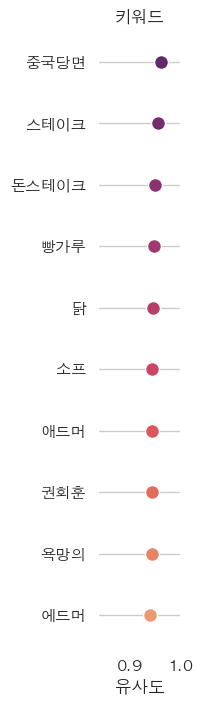

In [19]:
sns.set_theme(style="whitegrid", font='AppleGothic')

g = sns.PairGrid(grf_df.sort_values("유사도", ascending=False),
                 x_vars=grf_df.columns[1:], y_vars=["단어"],
                 height=7, aspect=.25)

g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w"
     )

min_val = grf_df['유사도'].min() - 0.1

g.set(xlim=(min_val, 1), xlabel="유사도", ylabel="")

titles = ['키워드']

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

plt.savefig('0.png')